In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
dataframe = pd.read_csv('medical-data-visualizer/medical_examination.csv')
df = pd.DataFrame(dataframe)

#2
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df = df.drop(columns= ['BMI'])
df= df.astype('float')

# 3
# '0' = Good, '1' = Bad
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

    # 6
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})

    # 7
    sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
    
    # 8
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
    df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025))]
    df_heat = df_heat[(df_heat['height'] <= df_heat['height'].quantile(0.975))]
    df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025))]
    df_heat = df_heat[(df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

    # 12
    corr = round(df_heat.corr(),1)
    print(corr)
    
    # 13
    mask = np.triu(np.ones_like(corr))
    print(mask)

    # 14
    fig, ax = plt.subplots()

    # 15
    sns.heatmap(corr, annot=True, mask=mask, cmap='icefire')
    # plt.tight_layout()
    
    # 16
    fig.savefig('heatmap.png')
    return fig


              id  age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
id           1.0  0.0  0.0     0.0     0.0    0.0    0.0          0.0   0.0   
age          0.0  1.0 -0.0    -0.1     0.1    0.0    0.2          0.1   0.1   
sex          0.0 -0.0  1.0     0.5     0.1    0.0    0.1         -0.0  -0.0   
height       0.0 -0.1  0.5     1.0     0.2    0.0    0.0         -0.1  -0.0   
weight       0.0  0.1  0.1     0.2     1.0    0.0    0.2          0.1   0.1   
ap_hi        0.0  0.0  0.0     0.0     0.0    1.0    0.1          0.0   0.0   
ap_lo        0.0  0.2  0.1     0.0     0.2    0.1    1.0          0.1   0.1   
cholesterol  0.0  0.1 -0.0    -0.1     0.1    0.0    0.1          1.0   0.4   
gluc         0.0  0.1 -0.0    -0.0     0.1    0.0    0.1          0.4   1.0   
smoke       -0.0 -0.0  0.3     0.2     0.1   -0.0    0.0          0.0  -0.0   
alco        -0.0 -0.0  0.2     0.1     0.1    0.0    0.0          0.0   0.0   
active       0.0 -0.0  0.0    -0.0    -0.0   -0.0   

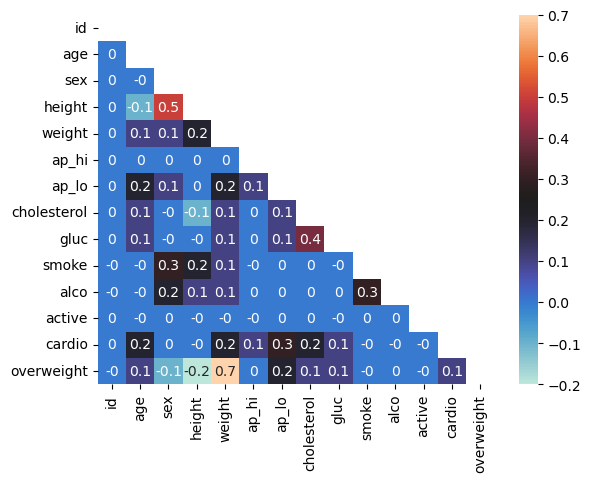

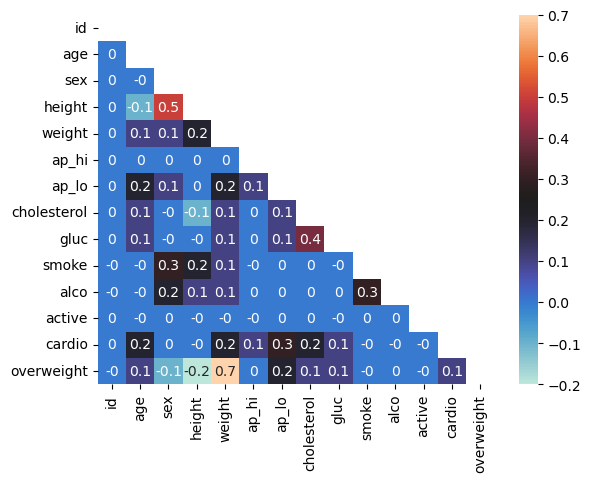

In [22]:
draw_heat_map()